In [1]:
import numpy as np
import pandas as pd
import os

datadir = os.path.join('..', 'WISDM_at_v2.0')
raw_headers = ['user','activity','time','x','y','z']
act_headers = ['user','X0','X1','X2','X3','X4','X5','X6','X7','X8','X9','Y0','Y1','Y2','Y3','Y4','Y5','Y6','Y7','Y8','Y9','Z0','Z1','Z2','Z3','Z4','Z5','Z6','Z7','Z8','Z9','XAVG','YAVG','ZAVG','XPEAK','YPEAK','ZPEAK','XABSOLDEV', 'YABSOLDEV','ZABSOLDEV','XSTANDDEV','YSTANDDEV','ZSTANDDEV','Resultant','Activity']


In [13]:
labelled_act = os.path.join(datadir,'WISDM_at_v2.0_transformed.csv')
labelled_raw = os.path.join(datadir, 'WISDM_at_v2.0_raw.txt')
unlabelled_act = os.path.join(datadir,'WISDM_at_v2.0_unlabeled_transformed.csv')
unlabelled_raw = os.path.join(datadir, 'WISDM_at_v2.0_unlabeled_raw.txt')
raw_data = pd.read_csv(unlabelled_raw, header=None, names = raw_headers, parse_dates=True)
act_data = pd.read_csv(unlabelled_act, header=None, names = act_headers) 
lab_raw = pd.read_csv(labelled_raw, header=None, names = raw_headers, parse_dates=True)
lab_act = pd.read_csv(labelled_act, header=None, names = act_headers)


In [14]:
print "concat raw"
#raw_data = pd.concat([unlabelled_raw_data, raw_data])
#raw_data = unlabelled_raw_data
#act_data = unlabelled_act_data
#del unlabelled_raw_data
print "concat act"
#act_data = pd.concat([unlabelled_act_data, act_data])
#del unlabelled_act_data
print "concat over"

lab_raw = lab_raw.loc[lab_raw['time']>0]
lab_raw['time'] = pd.to_datetime(lab_raw['time'], unit = 'ms', errors='coerce')
raw_data = raw_data.loc[raw_data['time']>0]
raw_data['time'] = pd.to_datetime(raw_data['time'], unit = 'ms', errors='coerce')

concat raw
concat act
concat over


In [8]:
raw_data = pd.concat([raw_data,lab_raw])
del lab_raw
#act_data = pd.concat([act_data, lab_act])
#del act_data
#del lab_act


AttributeError: 'DataFrame' object has no attribute 'users'

In [10]:
users = raw_data.user.unique()

In [12]:
for userid in users:
    user_raw_data = raw_data.loc[raw_data['user']==userid]
    user_raw_data = user_raw_data.sort_values('time')
    prev_time = user_raw_data.iloc[0]['time']
    gap = 0
    print userid, 'GAP LENGTHS'
    for index, attr in user_raw_data.iterrows():
        tgap = (attr[2] - prev_time).total_seconds()
        if  tgap > 120:
            gap = gap + 1
            print tgap//60, 'min..i.e.', tgap,'s'
        prev_time = attr[2]
    print '#gaps:',gap


1776 GAP LENGTHS
#gaps: 0
1679 GAP LENGTHS
#gaps: 0
1251 GAP LENGTHS
#gaps: 0
599 GAP LENGTHS
#gaps: 0
685 GAP LENGTHS
#gaps: 0
669 GAP LENGTHS
#gaps: 0
1277 GAP LENGTHS
486.0 min..i.e. 29167.502 s
1209.0 min..i.e. 72567.449 s
88.0 min..i.e. 5328.351 s
1072.0 min..i.e. 64334.102 s
1092.0 min..i.e. 65533.533 s
236752.0 min..i.e. 14205132.612 s
2.0 min..i.e. 123.856 s
11590.0 min..i.e. 695454.75 s
659.0 min..i.e. 39566.735 s
#gaps: 9
674 GAP LENGTHS
#gaps: 0
594 GAP LENGTHS
#gaps: 0
1717 GAP LENGTHS
#gaps: 0
678 GAP LENGTHS
#gaps: 0
1557 GAP LENGTHS
#gaps: 0
648 GAP LENGTHS
#gaps: 0
1636 GAP LENGTHS
#gaps: 0
584 GAP LENGTHS
#gaps: 0
1658 GAP LENGTHS
#gaps: 0
1733 GAP LENGTHS
381.0 min..i.e. 22894.791 s
#gaps: 1
582 GAP LENGTHS
#gaps: 0
1769 GAP LENGTHS
1216.0 min..i.e. 72995.801 s
1358.0 min..i.e. 81529.742 s
317.0 min..i.e. 19046.514 s
2.0 min..i.e. 172.512 s
#gaps: 4
636 GAP LENGTHS
#gaps: 0
1758 GAP LENGTHS
2.0 min..i.e. 138.115 s
45.0 min..i.e. 2718.054 s
1200.0 min..i.e. 72010.588 s

69.0 min..i.e. 4196.78 s
2125.0 min..i.e. 127545.905 s
11.0 min..i.e. 682.179 s
187396.0 min..i.e. 11243798.208 s
2.0 min..i.e. 124.188 s
15.0 min..i.e. 908.393 s
3.0 min..i.e. 208.266 s
2.0 min..i.e. 120.355 s
9.0 min..i.e. 579.163 s
5.0 min..i.e. 333.818 s
4.0 min..i.e. 248.58 s
2.0 min..i.e. 144.012 s
2.0 min..i.e. 125.609 s
15.0 min..i.e. 919.192 s
2.0 min..i.e. 150.173 s
390.0 min..i.e. 23400.224 s
14.0 min..i.e. 863.268 s
12.0 min..i.e. 737.355 s
8.0 min..i.e. 497.078 s
2.0 min..i.e. 121.432 s
6.0 min..i.e. 400.974 s
2.0 min..i.e. 140.405 s
13.0 min..i.e. 780.895 s
14.0 min..i.e. 873.839 s
108.0 min..i.e. 6507.477 s
5130.0 min..i.e. 307819.055 s
27873.0 min..i.e. 1672431.6 s
70.0 min..i.e. 4214.603 s
2799.0 min..i.e. 167975.203 s
616.0 min..i.e. 37004.382 s
4669.0 min..i.e. 280199.625 s
52.0 min..i.e. 3179.215 s
6.0 min..i.e. 377.36 s
2.0 min..i.e. 165.488 s
2.0 min..i.e. 122.868 s
348.0 min..i.e. 20933.997 s
723.0 min..i.e. 43435.57 s
2.0 min..i.e. 168.76 s
2146.0 min..i.e. 1288

KeyboardInterrupt: 

In [15]:
#users in unlabelled set
users = list(set(raw_data.user.unique()).intersection(set(act_data.user.unique())))
print len(users)
time_user_raw = raw_data[['user','time']]
user_duration = time_user_raw.groupby('user').agg({'time':[min,max]})
user_duration.columns = ["_".join(x) for x in user_duration.columns.ravel()]
user_duration['duration'] = user_duration['time_max'] - user_duration['time_min']
#print user_duration.sort_values(by='duration').loc[act_data.user.unique()]['duration']
user_duration = user_duration.loc[users]
user_duration = user_duration[(user_duration['duration'].dt.total_seconds()) > 14400]
#users in labelled set
lab_users = list(set(lab_raw.user.unique()).intersection(set(lab_act.user.unique())))
#common users
comm_users = list(set(lab_users).intersection(set(users)))

time_user_raw_l = lab_raw[['user','time']]
time_user_raw_l = time_user_raw_l.loc[time_user_raw_l['user'].isin(comm_users)]
user_duration_l = time_user_raw_l.groupby('user').agg({'time':[min,max]})
user_duration_l.columns = ["_".join(x) for x in user_duration_l.columns.ravel()]
user_duration_l['duration'] = user_duration_l['time_max'] - user_duration_l['time_min']
user_duration_l = user_duration_l[(user_duration_l['duration'].dt.total_seconds()) > 14400]

#remove common users with overlapping durations
overlapped = []
for usr in comm_users:
    lstime = user_duration_l.loc[user_duration_l.index==usr]['time_min'].values
    letime = user_duration_l.loc[user_duration_l.index==usr]['time_max'].values
    stime = user_duration.loc[user_duration.index==usr]['time_min'].values
    etime = user_duration.loc[user_duration.index==usr]['time_max'].values
    #print lstime,letime, stime, etime
    if (lstime>stime and lstime<etime) or (letime>stime and letime<etime) or (lstime<stime and letime>etime):
        overlapped.append(usr)

all_users = users
users = [usr for usr in all_users if (usr not in overlapped) and ((usr in user_duration.index) or (usr in user_duration_l.index))]

#filter all suitable users from labelled and unlabelled set and concat
unlabelled_raw_data = raw_data.loc[raw_data['user'].isin(users)]
unlabelled_act_data = act_data.loc[act_data['user'].isin(users)]
labelled_raw_data = lab_raw.loc[lab_raw['user'].isin(users)]
labelled_act_data = lab_act.loc[lab_act['user'].isin(users)]

raw_data = pd.concat([labelled_raw_data,unlabelled_raw_data])
del labelled_raw_data
del unlabelled_raw_data
act_data = pd.concat([labelled_act_data, unlabelled_act_data])
del labelled_act_data
del unlabelled_act_data

#print user_duration.sort_values(by='duration')['duration']
#users = user_duration.index

143


C:\ProgramData\Anaconda2\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.


In [16]:
import pickle
pickle.dump(raw_data, open('raw_data_selected.dump','wb'))
pickle.dump(act_data, open('act_data_selected.dump','wb'))

In [10]:
demo = unlabelled_raw = os.path.join(datadir, 'WISDM_at_v2.0_demographics.txt')
demographics = pd.read_csv(demo, header=None)


0         1
1         2
2         3
3         4
4         5
5         6
6         7
7         8
8         9
9        10
10       11
11       12
12       13
13       14
14       15
15       16
16       17
17       18
18       19
19       20
20       21
21       22
22       23
23       24
24       25
25       26
26       27
27       28
28       29
29       30
       ... 
533    1731
534    1732
535    1733
536    1736
537    1738
538    1739
539    1740
540    1742
541    1745
542    1750
543    1758
544    1760
545    1760
546    1760
547    1761
548    1763
549    1767
550    1769
551    1775
552    1776
553    1783
554    1791
555    1793
556    1798
557    1807
558    1809
559    1812
560    1812
561    1812
562    1812
Name: 0, Length: 563, dtype: int64

In [16]:
print set(users)
#print set(demographics[0].unique())
print set(users)-set(demographics[0].unique())

set([1664, 1793, 1801, 1802, 1550, 1556, 1685, 925, 1696, 1058, 1702, 1191, 1064, 1577, 1726, 1736, 1783, 1484, 1314, 1104, 1233, 1491, 1748, 1294, 1239, 1753, 1498, 1501, 1758, 1634, 1763, 1745, 1512, 1769, 1775, 1704, 1140, 1526, 1193, 1791])
set([1664, 1801, 1802, 1550, 1556, 1685, 925, 1696, 1314, 1702, 1191, 1704, 1577, 1726, 1484, 1233, 1491, 1748, 1294, 1239, 1753, 1498, 1501, 1634, 1512, 1140, 1193])


In [17]:
print users
activity_duration = {'Walking': 0, 'Jogging': 1, 'Standing': 2, 'Sitting': 3, 'Stairs': 4, 'LyingDown': 5}
user_feats = []
#users = []
nan_users = {}
for userid in users:
    user_act_data = act_data.loc[act_data['user']==userid]['Activity']
    prev = user_act_data.iloc[0]
    #feat = [walk_dur, jog_dur, stand_dur, sit_dur, stair_dur, ly_dur, no_tx, walk_jog, walk_sit, sit_walk]
    feat = [0.0]*7
    txfeat = [0.0]*36
    tot_dur = 0
    for i,activity in user_act_data.iteritems():
        if tot_dur<2521:
            if activity_duration.get(activity, -1)==-1:
                nan_users[userid] = i        
                print userid, activity
            feat_index = activity_duration.get(activity, -1)
            if feat_index != -1:
                #print activity
                feat[feat_index] = feat[feat_index] + 1
                if activity!= prev:
                    feat[6] = feat[6] + 1
                    pfeat_index = activity_duration.get(activity)
                    index = (6*pfeat_index)+feat_index
                    txfeat[index] = txfeat[index]+1
                prev = activity
            #else:
                #print userid, activity
            tot_dur = tot_dur + 1
        else:
            break
    dfeat = [x/tot_dur for x in feat[:-1] ]
    if feat[6]!=0:
        txfeat = [x/feat[6] for x in txfeat ]
    ufeat = dfeat+txfeat
    user_feats.append(ufeat)
    print len(ufeat)
    #users.append(userid)


[1550, 1556, 1058, 1064, 1577, 1804, 1104, 1634, 1647, 1140, 1664, 1685, 1696, 1702, 1191, 1193, 1736, 1726, 1233, 1748, 1239, 1753, 1758, 1769, 1791, 1793, 1801, 1802, 1294, 1314, 1763, 1775, 925, 1745, 1783, 1484, 1491, 1498, 1501, 1512, 1704, 1526]
42
42
42
42
42
42
42
42
42
42
42
42
42
42
42
42
42
42
42
42
42
42
42
42
42
42
42
42
42
42
42
42
42
42
42
42
42
42
42
42
42
42


In [13]:
activity_duration.keys()

['Standing', 'Walking', 'Sitting', 'Jogging', 'LyingDown', 'Stairs']

In [6]:
for userid in users:
    user_act_data = act_data.loc[act_data['user']==userid]['Activity']
    print user_act_data.head()

5033    Standing
5034    Standing
5035    Standing
5036    Standing
5037    Standing
Name: Activity, dtype: object
5139    Stairs
5140    Stairs
5141    Stairs
5142    Stairs
5143    Stairs
Name: Activity, dtype: object
5148    Sitting
5149    Sitting
5150    Sitting
5151    Sitting
5152    Sitting
Name: Activity, dtype: object
5332     Walking
5333    Standing
5334     Sitting
Name: Activity, dtype: object
3885    Standing
3886    Standing
3887    Standing
3888    Standing
3889    Standing
Name: Activity, dtype: object
3165    Walking
3166    Walking
3167    Walking
3168    Walking
3169    Walking
Name: Activity, dtype: object
3201    Walking
3202    Walking
3203    Walking
3204    Walking
3205    Walking
Name: Activity, dtype: object
3987    Sitting
3988    Sitting
3989    Sitting
3990    Sitting
3991    Sitting
Name: Activity, dtype: object
1979    Walking
1980    Walking
1981    Walking
1982    Walking
1983    Walking
Name: Activity, dtype: object
2550    Sitting
2551    Sitting
25

In [18]:
print users
print len(users)
print len(user_feats)
ufeats = np.array(user_feats)
print ufeats

[1550, 1556, 1058, 1064, 1577, 1804, 1104, 1634, 1647, 1140, 1664, 1685, 1696, 1702, 1191, 1193, 1736, 1726, 1233, 1748, 1239, 1753, 1758, 1769, 1791, 1793, 1801, 1802, 1294, 1314, 1763, 1775, 925, 1745, 1783, 1484, 1491, 1498, 1501, 1512, 1704, 1526]
42
42
[[0.03332011 0.         0.05632685 ... 0.         0.         0.1171875 ]
 [0.07774693 0.         0.00396668 ... 0.         0.         0.17164179]
 [0.33641108 0.         0.         ... 0.         0.         0.32775453]
 ...
 [0.28163427 0.02023007 0.23760413 ... 0.         0.         0.07542579]
 [0.         0.         0.         ... 0.         0.         0.5       ]
 [0.02181674 0.         0.0210234  ... 0.         0.         0.4037037 ]]


In [19]:
from sklearn.mixture import GaussianMixture
from sklearn.model_selection import cross_validate

for n in range(2,10):
    gmm = GaussianMixture(n_components=n)
    cv_results = cross_validate(gmm, user_feats, cv=10,  return_train_score=False)
    print n, cv_results

ImportError: cannot import name _k_means

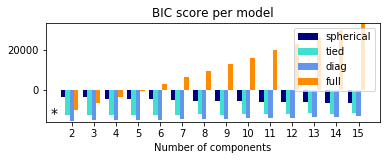

In [19]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from sklearn import mixture
import itertools

n_components_range = range(2,16)
cv_types = ['spherical', 'tied', 'diag', 'full']
lowest_bic = np.infty
bic = []
for cv_type in cv_types:
    for n_components in n_components_range:
        # Fit a Gaussian mixture with EM
        gmm = mixture.GaussianMixture(n_components=n_components,
                                      covariance_type=cv_type)
        gmm.fit(ufeats)
        bic.append(gmm.bic(ufeats))
        if bic[-1] < lowest_bic:
            lowest_bic = bic[-1]
            best_gmm = gmm
            
bic = np.array(bic)
color_iter = itertools.cycle(['navy', 'turquoise', 'cornflowerblue',
                              'darkorange'])
clf = best_gmm
bars = []

# Plot the BIC scores
spl = plt.subplot(2, 1, 1)
for i, (cv_type, color) in enumerate(zip(cv_types, color_iter)):
    xpos = np.array(n_components_range) + .2 * (i - 2)
    bars.append(plt.bar(xpos, bic[i * len(n_components_range):
                                  (i + 1) * len(n_components_range)],
                        width=.2, color=color))
plt.xticks(n_components_range)
plt.ylim([bic.min() * 1.01 - .01 * bic.max(), bic.max()])
plt.title('BIC score per model')
xpos = np.mod(bic.argmin(), len(n_components_range)) + .65 +\
    .2 * np.floor(bic.argmin() / len(n_components_range))
plt.text(xpos, bic.min() * 0.97 + .03 * bic.max(), '*', fontsize=14)
spl.set_xlabel('Number of components')
spl.legend([b[0] for b in bars], cv_types)



Text(0.5,0,u'n_components')

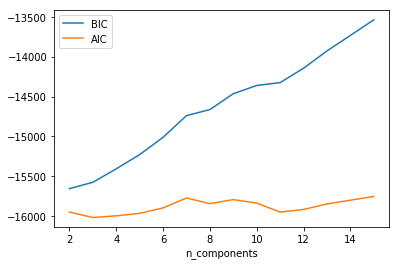

In [21]:
models = [GaussianMixture(n, covariance_type='diag', random_state=0).fit(ufeats) for n in n_components_range]
plt.plot(n_components_range, [m.bic(ufeats) for m in models], label='BIC')
plt.plot(n_components_range, [m.aic(ufeats) for m in models], label='AIC')
plt.legend(loc='best')
plt.xlabel('n_components')

In [22]:
from sklearn.cluster import DBSCAN
from sklearn import metrics
db = DBSCAN(eps=0.3).fit(ufeats)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
db_labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(db_labels)) - (1 if -1 in db_labels else 0)

print('Estimated number of clusters: %d' % n_clusters_)
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(ufeats, db_labels))

Estimated number of clusters: 2
Silhouette Coefficient: 0.380


In [23]:
#cluster characteristics when 5 clusters for GMM and 3 for DBSCAN
gmm = GaussianMixture(11, covariance_type='diag', random_state=0).fit(ufeats)
user_labels_gmm = gmm.predict(ufeats)
print user_labels_gmm

def indices( mylist, value):
    return [i for i,x in enumerate(mylist) if x==value]

gmm_clusters = {}
for n in range(8):
   gmm_clusters[n] = indices(user_labels_gmm, n)
    
#dbscan clusters
db_clusters = {}
for n in range(2):
    db_clusters[n] = indices(db_labels, n)

print 'gmm:', gmm_clusters
print 'db:',db_clusters

[ 0  0  8  8  5  1  0  8  8  2  7  8  8  8 10  2  4  1  2  7  2  6  4  1
  6  9  1  0  2 10  4  0  4  3  4  0  1  0  0  5  7  1]
gmm: {0: [0, 1, 6, 27, 31, 35, 37, 38], 1: [5, 17, 23, 26, 36, 41], 2: [9, 15, 18, 20, 28], 3: [33], 4: [16, 22, 30, 32, 34], 5: [4, 39], 6: [21, 24], 7: [10, 19, 40]}
db: {0: [3, 5, 7, 8, 10, 12, 13, 19, 23, 26, 36, 40, 41], 1: [9, 15, 18, 20, 28]}


In [24]:
for cluster in gmm_clusters.keys():
    users_in_cluster = gmm_clusters[cluster]
    print 'CLUSTER ', cluster
    for u in users_in_cluster:
        print users[u],':',user_feats[u]
        
print 'DBSCAN'
for cluster in db_clusters.keys():
    users_in_cluster = db_clusters[cluster]
    print 'CLUSTER ', cluster
    for u in users_in_cluster:
        print users[u],':',user_feats[u]

CLUSTER  0
1550 : [0.03332011106703689, 0.0, 0.05632685442284808, 0.6402221340737803, 0.005553351844506148, 0.26457754859182864, 0.3046875, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2578125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2265625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.09375, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.1171875]
1556 : [0.07774692582308608, 0.0, 0.003966679888932963, 0.64260214200714, 0.005553351844506148, 0.2701309004363348, 0.41044776119402987, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.029850746268656716, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.31343283582089554, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.07462686567164178, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.17164179104477612]
1104 : [0.10154700515668386, 0.011503371677905593, 0.1074970249900833, 0.45537485124950416, 0.08925029750099167, 0.2348274494248314, 0.11616650532429816, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000968054211035818, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.14230396902226525, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,

Int64Index([ 194, 1104, 1117, 1238, 1253, 1277, 1319, 1320, 1491, 1512, 1531,
            1559, 1603, 1696, 1703, 1707, 1723, 1724, 1726, 1742, 1745, 1750,
            1758, 1759, 1763, 1774, 1775, 1778, 1793, 1802],
           dtype='int64', name=u'user')


In [25]:
user_duration.duration.describe()

count                            55
mean       554 days 16:07:08.616563
std       2713 days 22:37:35.223182
min          0 days 05:29:59.152000
25%          1 days 07:56:44.162500
50%         11 days 14:46:52.876000
75%         83 days 21:47:24.042500
max      15980 days 04:16:40.466000
Name: duration, dtype: object